# Summary


## this is a summary of post process cresm data

In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seawater as csr
from matplotlib import cm
from scipy.interpolate import griddata as gd
from matplotlib.mlab import griddata

#### basemap

In [6]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## 1. CRESM input data

In [4]:
# read in cresm input data
path1="/localdata/xiaoxiaoyu/CRESM"
nc1=Dataset(path1+"/copernicus_amazon_prep.nc")
# nc1.set_auto_mask(False)  # x.mask = ma.nomask
lon_curv=nc1.variables['longitude'][:]
lat_curv=nc1.variables['latitude'][:]
z=nc1.variables['depth'][:]
temp=nc1.variables['temperature'][0,:,:,:]  #only use the first date
salt=nc1.variables['salinity'][0,:,:,:]
nc2=Dataset(path1+"/copernicus_amazon_prep_2.nc")
temp2=nc2.variables['temperature'][0,:,:,:]  #only use the first date
salt2=nc2.variables['salinity'][0,:,:,:]

In [5]:
# 计算混合层
[rows, cols]=salt[0,:,:].shape 
mld_t=np.full_like(temp[0,:,:],None)
for j in range(cols):
    for i in range(rows):
        mld_t[i,j]=mld_temp(temp[:,i,j],z)
        # depth should be negative, the result is also negative
        
mld_r=np.full_like(temp[0,:,:],None)
for j in range(cols-1):
    for i in range(rows-1):
        mld_r[i,j]=mld_density(temp[:,i,j],salt[:,i,j],z) 
        
blt=mld_t-mld_r

mld_r2=np.full_like(temp[0,:,:],None)
for j in range(cols-1):
    for i in range(rows-1):
        mld_r2[i,j]=mld_density(temp[:,i,j],salt2[:,i,j],z) 

blt2=mld_t-mld_r2

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/eos80.py:465: RuntimeWarning: invalid value encountered in true_divide
  return densP0 / (1 - p / K)


### 画图，用上了basemap

Text(0.5,1,'BLT before change')

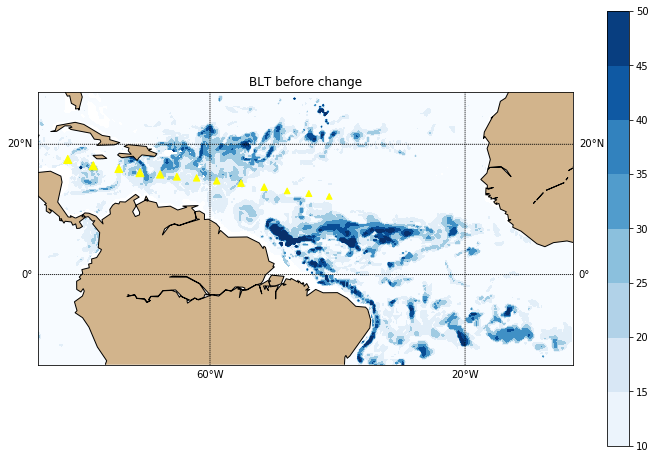

In [7]:
# 画图，用上了basemap!!! 

fig = plt.figure(num=None, figsize=(12, 8) )
# m = Basemap(projection='merc',llcrnrlat=-30,urcrnrlat=42,llcrnrlon=-100,urcrnrlon=20,resolution='c')
m = Basemap(projection='merc',llcrnrlat=-14,urcrnrlat=27.5,llcrnrlon=-87,urcrnrlon=-3,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan')
# draw parallels and meridians.
m.drawparallels(np.arange(-20.,40.,20.),labels=[True,True,False,False],dashes=[1,1])
m.drawmeridians(np.arange(-100.,20.,40.),labels=[False,False,False,True],dashes=[1,1])


ny = blt.shape[0]
nx = blt.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
p = m.contourf(x, y, blt, 20, vmin=10, vmax=50, cmap=plt.cm.get_cmap('Blues', 20))  #cm.nipy_spectral,bwr, RdBu_r , vmin=-2, vmax=2


cbar = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('Blues', 20))
cbar.set_array(blt)
cbar.set_clim(10,50)
plt.colorbar(cbar, boundaries=np.arange(10,55,5))  #

xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05]
s = vmax*5
x,y=m(xh,yh)
plt.scatter(x, y, s, c="yellow", marker='^',label="Dean track")
plt.title('BLT before change')

### 在地图上，加框框

Text(0.5,1,'CRESM Domain')

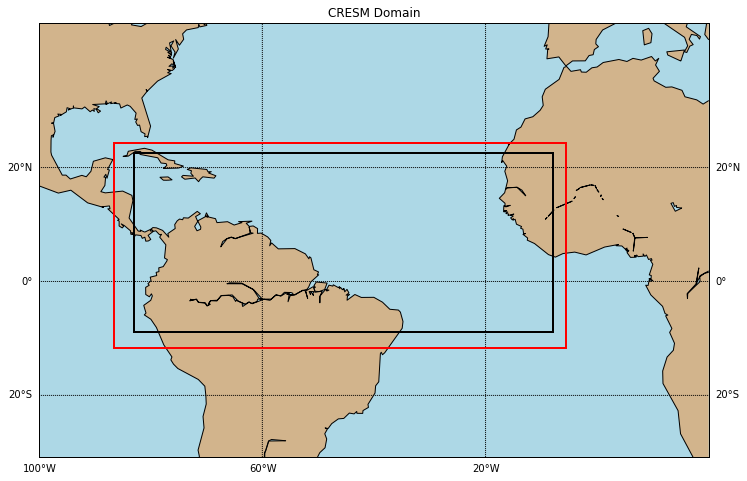

In [14]:
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-30,urcrnrlat=42,llcrnrlon=-100,urcrnrlon=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-20.,40.,20.),labels=[True,True,False,False],dashes=[1,1])
m.drawmeridians(np.arange(-100.,20.,40.),labels=[False,False,False,True],dashes=[1,1])
m.drawmapboundary(fill_color='lightblue')

lon_x=[-83, -8]

lat_y=[-9,-9]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='k') 

lat_y=[22.5,22.5]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='k') 

lon_x=[-83, -83]
lat_y=[-9,22.5]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='k') 

lon_x=[-8, -8]
lat_y=[-9,22.5]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='k') 

lon_x = -40
lat_y = 10
x, y = m(lon_x, lat_y)

# plt.text(x, y, 'ROMS',fontsize=12,fontweight='bold',
#                     ha='left',va='bottom',color='k')



lon_x=[-86.5, -5.5]

lat_y=[-11.8,-11.8]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='r') 

lat_y=[24.1,24.1]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='r') 

lon_x=[-86.5, -86.5]
lat_y=[-11.8,24.1]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='r') 

lon_x=[-5.5, -5.5]
lat_y=[-11.8,24.1]
x,y=m(lon_x,lat_y)
plt.plot(x, y, '-', linewidth=2, color='r') 



plt.title("CRESM Domain")

### 单点剖面

In [15]:
density=np.full_like(temp,None)
for j in range(0,cols):
    for i in range(0,rows):
        density[:,i,j] = csr.dens(salt[:,i,j] , temp[:,i,j] , z)   # depth should be postive
        

In [19]:
density2=np.full_like(temp,None)
for j in range(0,cols):
    for i in range(0,rows):
        density2[:,i,j] = csr.dens(salt2[:,i,j] , temp[:,i,j] , z)   # depth should be postive

16.0 -52.0


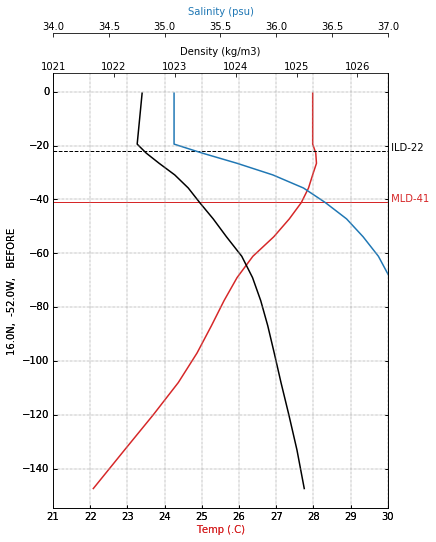

NameError: name 'density2' is not defined

In [18]:

N=28
lat0_bad=120  #18.5
lon0_bad=140
lat_c=lat_curv[lat0_bad]
lon_c=lon_curv[lon0_bad]

print(lat_c,lon_c)
depth=z[0:N]*-1

dens0_bad=density[0:N,lat0_bad,lon0_bad]
salt0_bad=salt[0:N,lat0_bad,lon0_bad]
temp0_bad=temp[0:N,lat0_bad,lon0_bad]
ild1=int(mld_r[lat0_bad,lon0_bad])
mld1=int(mld_t[lat0_bad,lon0_bad])

ax1 = fig.add_subplot(1, 2, 1)
point_str=str(lat_c)+"N,  "+str(lon_c)+"W,   BEFORE"
ax1=plot_profile_blt_oneline(temp0_bad,salt0_bad,depth,point_str,ild1,mld1)

# dens0_bad=density2[0:N,lat0_bad,lon0_bad]
# salt0_bad=salt2[0:N,lat0_bad,lon0_bad]
# temp0_bad=temp2[0:N,lat0_bad,lon0_bad]

# ild1=int(mld_r2[lat0_bad,lon0_bad])
# mld1=int(mld_t[lat0_bad,lon0_bad])
# ax2 = fig.add_subplot(1, 2, 2)
# ax2=point_str=str(lat_c)+"N,  "+str(lon_c)+"W,   AFTER"
# ax2=plot_profile_blt_oneline(temp0_bad,salt0_bad,depth,point_str,ild1,mld1)

## 2. CRESM output data, plot temp salt contours 

## Functions 

In [2]:
# calculate the mld by temperature
# z 的正负 没有关系  
# input data 的混合层10m，在ind_10m=7，每次都要检查一下
def mld_temp(temp, z):
    # default: 10m layer is in the ind=1 layer 
    # ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=7
    for index, dep in enumerate(z[ind_10m::]):
        if temp[index+ind_10m]<temp[ind_10m]-0.2:
            return dep
            break


In [3]:
# http://www.ifremer.fr/cerweb/deboyer/mld/Surface_Mixed_Layer_Depth.php 
# calculate density mld
#  计算位势密度
#  输入的z 是 正数
def mld_density(temp,salt,z):
    # temp, salt is 1d, only has the depth
    # default: 10m layer is in the ind=1 layer 
    density_profiles = csr.dens(salt, temp, 0)  #the origianl density
    ind_10m=7
    # calculate the critical density 
    #ind_10m=np.where((z<-9)&(z>-11))[0][0]
    
    delta_density=csr.dens(salt[ind_10m], temp[ind_10m]-0.2, 0)-csr.dens(salt[ind_10m], temp[ind_10m], 0)
#     print(delta_density)
    density_zero=density_profiles[ind_10m]+delta_density
    
#     rou0=min(density_profiles[ind_10m::], key=lambda x:abs(x-density_zero))
    rou0=density_profiles[np.where(density_profiles-density_zero>=0)][0]
    ind=np.argwhere(density_profiles==rou0)
    if ind.size==0:
        return None
    else:
        return z[ind][0][0]

In [17]:
def plot_profile_blt_oneline(temp1,salt1,depth,point_str,ild1,mld1):
    # use temp and salt to calulate density, then use depth to calculate BLT, ILD, MLD
    #  plot the ILD, MLD lines
    #  add the salinity 
    #  point_str,date are string 

    t=depth
    ild1=ild1*-1
    mld1=mld1*-1
    dens1 = csr.dens(salt1, temp1, t)   # use this function to calulate density  
    
    from mpl_toolkits.axes_grid1 import host_subplot
    import mpl_toolkits.axisartist as AA

    fig = plt.figure(1, (6, 8))
    ax1 = host_subplot(111, axes_class=AA.Axes)
    color = 'tab:red'
    ax1.set_xlabel('Temp (.C)', color=color)
    ax1.set_ylabel(point_str, color='black')
    ax1.plot(temp1, t, color=color,label="before ILD")       
    ax1.tick_params(axis='x', labelcolor=color)
    ax1.grid(True, linestyle='-.',lw=0.4)

    tempmin=21
    tempmax=30
    ax1.set_xlim(tempmin, tempmax)
    ax1.plot([tempmin, tempmax], [mld1, mld1], linestyle ='-',lw=1, color=color)
    ax1.text(tempmax, mld1, ' MLD'+str(mld1), fontsize=10, color=color)
   
    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'black'
    ax2.plot(dens1,t, color=color,label="before MLD")
    densmin=1021
    densmax=1026.5
    ax2.set_xlim(densmin, densmax)
    ax2.plot([densmin, densmax], [ild1, ild1], linestyle ='--',lw=1, color=color)
    ax2.text(densmax, ild1,' ILD'+str(ild1), fontsize=10, color=color)
      #设置坐标轴摆放位置和距离
    offset = 0
    new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
    ax2.axis["top"] = new_fixed_axis(loc="top",axes=ax2,offset=( 0,offset))
    ax2.axis["top"].toggle(all=True)
    ax2.set_xlabel('Density (kg/m3)', color=color)  # we already handled the x-label with ax1
    ax2.tick_params(axis='x', labelcolor=color)
    

    ax3 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax3.plot(salt1,t, color=color,label="salinity")

    saltmin= 34
    saltmax= 37
    ax3.set_xlim(saltmin, saltmax)
    
    #设置坐标轴摆放位置和距离
    offset = 40
    new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
    ax3.axis["top"] = new_fixed_axis(loc="top",axes=ax3,offset=( 0,offset))
    ax3.axis["top"].toggle(all=True)
    ax3.set_xlabel('Salinity (psu)', color=color)
    ax3.tick_params(axis='top', labelcolor=color)
    

#     fig.tight_layout()
    return plt.show()